In [1]:
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import os
from tensorflow.keras.models import save_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2025-05-30 18:10:40.589220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path_prefix = "/home/efectn/python-music-classification"
json_path = os.path.join(path_prefix, "dataset/features_3.0_sec.json")

with open(json_path, "r") as fp:
    data = json.load(fp)

X = np.array(data["mfcc"])
y = np.array(data["genre_num"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (5593, 132, 13), y_train: (5593,)
X_val: (1399, 132, 13), y_val: (1399,)
X_test: (2997, 132, 13), y_test: (2997,)


In [13]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, activation='tanh', input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(10, activation='softmax'))

model_rnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model_rnn.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               18176     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,082
Trainable params: 27,082
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

hist_rnn = model_rnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=250,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/250
88/88 [==============================] - 2s 21ms/step - loss: 2.9539 - accuracy: 0.1176 - val_loss: 2.3516 - val_accuracy: 0.1901
Epoch 2/250
88/88 [==============================] - 2s 21ms/step - loss: 2.5635 - accuracy: 0.1382 - val_loss: 2.1957 - val_accuracy: 0.2102
Epoch 3/250
88/88 [==============================] - 2s 19ms/step - loss: 2.4242 - accuracy: 0.1611 - val_loss: 2.1284 - val_accuracy: 0.2330
Epoch 4/250
88/88 [==============================] - 2s 19ms/step - loss: 2.3241 - accuracy: 0.1836 - val_loss: 2.0899 - val_accuracy: 0.2509
Epoch 5/250
88/88 [==============================] - 2s 19ms/step - loss: 2.2733 - accuracy: 0.1972 - val_loss: 2.0638 - val_accuracy: 0.2666
Epoch 6/250
88/88 [==============================] - 2s 21ms/step - loss: 2.2146 - accuracy: 0.2163 - val_loss: 2.0420 - val_accuracy: 0.2752
Epoch 7/250
88/88 [==============================] - 2s 19ms/step - loss: 2.1955 - accuracy: 0.2124 - val_loss: 2.0277 - val_accuracy: 0.2866
Epoch 

In [15]:
loss_rnn, acc_rnn = model_rnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss_rnn}")
print(f"Test Accuracy: {acc_rnn}")

94/94 [==============================] - 1s 5ms/step - loss: 1.6192 - accuracy: 0.4141
Test Loss: 1.6191965341567993
Test Accuracy: 0.41408073902130127


In [16]:
def plot_history(hist):
    fig, axs = plt.subplots(2, 1, figsize=(8, 7))
    fig.tight_layout(pad=3)

    axs[0].plot(hist.history["accuracy"], c='navy', label="Training Accuracy")
    axs[0].plot(hist.history["val_accuracy"], c='orange', label="Validation Accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Model Accuracy")

    axs[1].plot(hist.history["loss"], c='navy', label="Training Loss")
    axs[1].plot(hist.history["val_loss"], c='orange', label="Validation Loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Model Loss")

    plt.show()

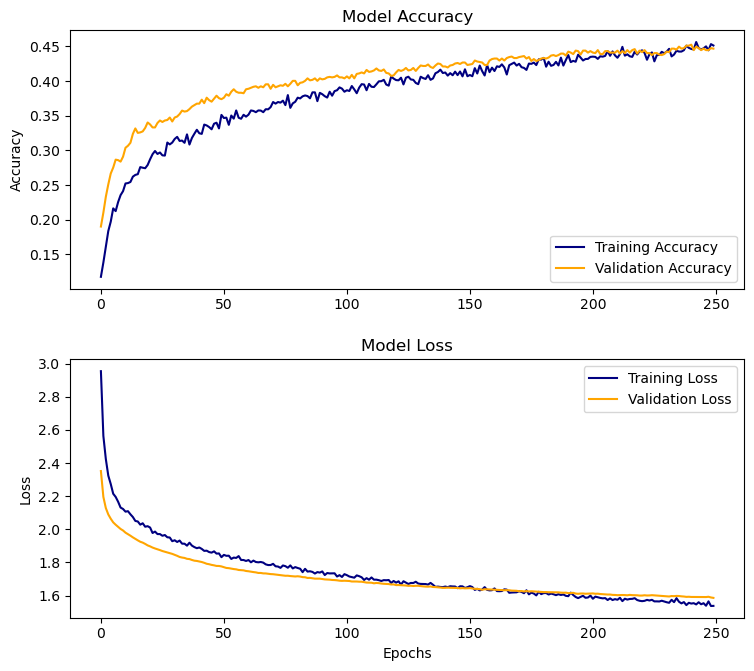

In [17]:
plot_history(hist_rnn)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, Reshape

model_cnn_rnn = Sequential()

X = X[..., np.newaxis]

# 1. CNN katmanları (örnek: Mel-spectrogram 2D verisi için)
model_cnn_rnn.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(X.shape[1], X.shape[2], X.shape[3])))
model_cnn_rnn.add(MaxPooling2D((2,2)))
model_cnn_rnn.add(Dropout(0.3))

model_cnn_rnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_cnn_rnn.add(MaxPooling2D((2,2)))
model_cnn_rnn.add(Dropout(0.3))

# Özellikleri zaman boyutuna göre grupla ve LSTM'ye hazırla
model_cnn_rnn.add(Reshape((model_cnn_rnn.output_shape[1], model_cnn_rnn.output_shape[2]*model_cnn_rnn.output_shape[3])))

# 2. RNN katmanı
model_cnn_rnn.add(LSTM(128, activation='tanh'))
model_cnn_rnn.add(Dropout(0.3))

# 3. Dense katmanlar
model_cnn_rnn.add(Dense(64, activation='relu'))
model_cnn_rnn.add(Dropout(0.3))
model_cnn_rnn.add(Dense(10, activation='softmax'))

model_cnn_rnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_cnn_rnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 132, 13, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 66, 6, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 66, 6, 32)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 66, 6, 64)         18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 33, 3, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 33, 3, 64)        

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

hist_cnn_rnn = model_cnn_rnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=250,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/250
88/88 [==============================] - 6s 53ms/step - loss: 2.2308 - accuracy: 0.1674 - val_loss: 2.0239 - val_accuracy: 0.2652
Epoch 2/250
88/88 [==============================] - 4s 48ms/step - loss: 2.1252 - accuracy: 0.2101 - val_loss: 1.9365 - val_accuracy: 0.3395
Epoch 3/250
88/88 [==============================] - 4s 47ms/step - loss: 1.9796 - accuracy: 0.2837 - val_loss: 1.7582 - val_accuracy: 0.3667
Epoch 4/250
88/88 [==============================] - 4s 46ms/step - loss: 1.9039 - accuracy: 0.3077 - val_loss: 1.7870 - val_accuracy: 0.3531
Epoch 5/250
88/88 [==============================] - 4s 47ms/step - loss: 1.8309 - accuracy: 0.3349 - val_loss: 1.6842 - val_accuracy: 0.3867
Epoch 6/250
88/88 [==============================] - 4s 45ms/step - loss: 1.7975 - accuracy: 0.3479 - val_loss: 1.6894 - val_accuracy: 0.3831
Epoch 7/250
88/88 [==============================] - 4s 46ms/step - loss: 1.7663 - accuracy: 0.3590 - val_loss: 1.5959 - val_accuracy: 0.3989
Epoch 

In [20]:
loss_cnn_rnn, acc_cnn_rnn = model_cnn_rnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss_cnn_rnn}")
print(f"Test Accuracy: {acc_cnn_rnn}")

94/94 [==============================] - 1s 8ms/step - loss: 0.7146 - accuracy: 0.7558
Test Loss: 0.7146030068397522
Test Accuracy: 0.7557557821273804


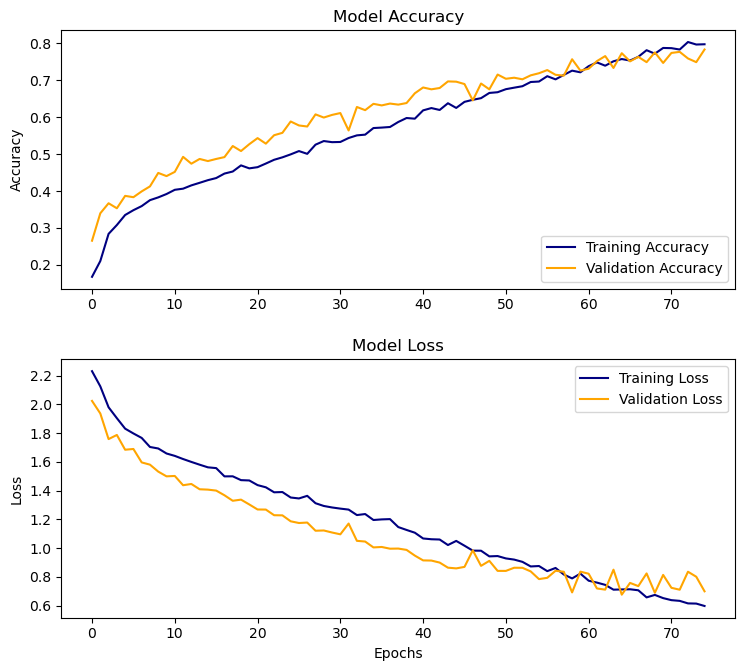

In [21]:
plot_history(hist_cnn_rnn)

1/1 [==============================] - 0s 14ms/step


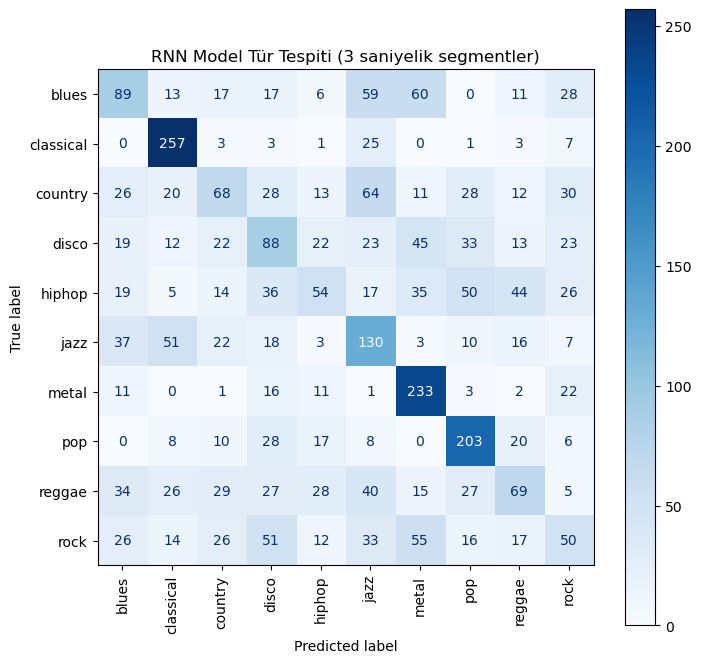

In [18]:
def make_prediction(model, X):
    global genres
    preds_num = []
    preds_name = []

    for X_current in X:
        X_current = X_current[np.newaxis, ...]
        pred = model.predict(X_current)
        pred = np.argmax(pred, axis=1)
        preds_num.append(pred[0])
        preds_name.append(genres[pred[0]])

    return preds_num, preds_name

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

preds_num, preds_name = make_prediction(model_rnn, X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds_num)

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('RNN Model Tür Tespiti (3 saniyelik segmentler)')
plt.show()


1/1 [==============================] - 0s 13ms/step


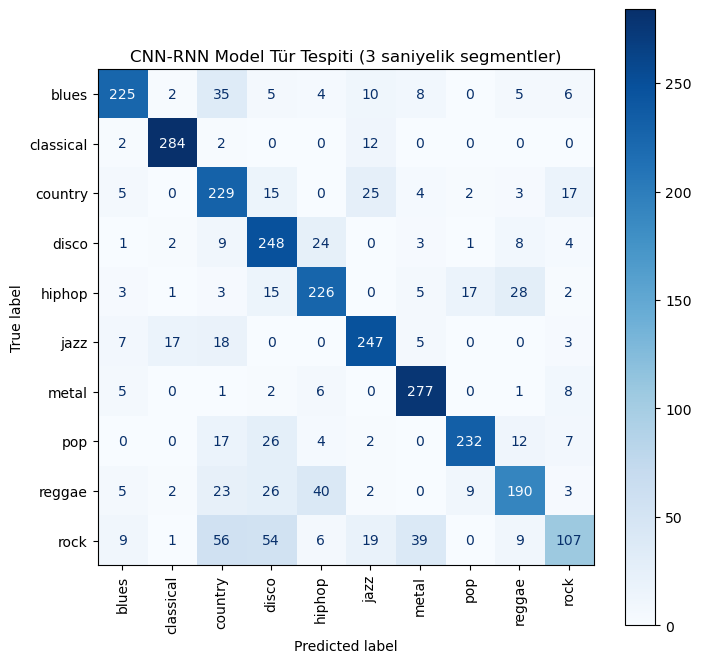

In [19]:
preds_num, preds_name = make_prediction(model_cnn_rnn, X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds_num)

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('CNN-RNN Model Tür Tespiti (3 saniyelik segmentler)')
plt.show()


In [28]:
save_model(model_rnn, "model_rnn.h5", save_format="keras")
save_model(model_cnn_rnn, "model_cnn_rnn.h5", save_format="keras")

In [23]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

def evaluate_model(model, X, y_true):
    global genres
    # Tahminleri al
    preds_num, _ = make_prediction(model, X)

    # Genel skorlar
    accuracy = accuracy_score(y_true, preds_num)
    precision_macro = precision_score(y_true, preds_num, average='macro', zero_division=0)
    precision_weighted = precision_score(y_true, preds_num, average='weighted', zero_division=0)
    f1_macro = f1_score(y_true, preds_num, average='macro')
    f1_weighted = f1_score(y_true, preds_num, average='weighted')

    # Genel sonuçları yazdır
    print("🔹 Genel Performans:")
    print(f"Accuracy               : {accuracy:.4f}")
    print(f"Precision (macro)      : {precision_macro:.4f}")
    print(f"Precision (weighted)   : {precision_weighted:.4f}")
    print(f"F1 Score (macro)       : {f1_macro:.4f}")
    print(f"F1 Score (weighted)    : {f1_weighted:.4f}")

    # Sınıf bazlı skorlar
    print("\n🔹 Tür Bazlı Performans (Precision, Recall, F1):")
    report = classification_report(y_true, preds_num, target_names=genres, zero_division=0)
    print(report)

    # Dictionary olarak da döndür
    return classification_report(y_true, preds_num, target_names=genres, output_dict=True, zero_division=0)


metrics = evaluate_model(model_cnn_rnn, X_test, y_test)

1/1 [==============================] - 0s 13ms/step
🔹 Genel Performans:
Accuracy               : 0.7558
Precision (macro)      : 0.7628
Precision (weighted)   : 0.7628
F1 Score (macro)       : 0.7501
F1 Score (weighted)    : 0.7500

🔹 Tür Bazlı Performans (Precision, Recall, F1):
              precision    recall  f1-score   support

       blues       0.86      0.75      0.80       300
   classical       0.92      0.95      0.93       300
     country       0.58      0.76      0.66       300
       disco       0.63      0.83      0.72       300
      hiphop       0.73      0.75      0.74       300
        jazz       0.78      0.83      0.80       297
       metal       0.81      0.92      0.86       300
         pop       0.89      0.77      0.83       300
      reggae       0.74      0.63      0.68       300
        rock       0.68      0.36      0.47       300

    accuracy                           0.76      2997
   macro avg       0.76      0.76      0.75      2997
weighted avg   